In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math
import plotly.graph_objects as go
import plotly.express as px
from functions import *
from tickers_list import *
from tqdm import tqdm
sns.set_style('whitegrid')

In [21]:
tickers = yf.Tickers(nifty50_tickers[:10])

In [20]:
bpcl = tickers.tickers['BPCL.NS']

In [29]:
ticker = yf.Ticker('ADANIPORTS.NS')

In [81]:
hist = yf.download(nifty50_tickers[:10], period='3y')

[*********************100%***********************]  10 of 10 completed


In [82]:
hist_adj_close = hist['Adj Close']

In [83]:
log_returns = np.log(hist_adj_close / hist_adj_close.shift(1))[1:]

<Axes: xlabel='Date'>

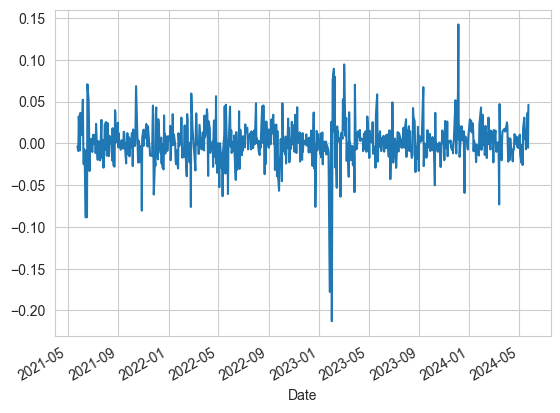

In [87]:
log_returns['ADANIPORTS.NS'].plot()

In [108]:
sorted_returns = log_returns['ADANIPORTS.NS'].sort_values()
sorted_returns

def find_percentile(k, sorted_array):
    ind = round(k/100*len(sorted_array))
    return sorted_array[ind]*100

In [110]:
top_5_return = find_percentile(95,sorted_returns)
worst_5_return = find_percentile(5, sorted_returns)

In [111]:
fig = plot_price(log_returns['ADANIPORTS.NS']*100, stock_name='ADANIPORTS.NS')
fig.add_trace(go.Scatter(x=log_returns['ADANIPORTS.NS'].index, 
                         y=np.ones(len(log_returns['ADANIPORTS.NS']))*top_5_return, 
                         mode='lines', line=dict(width=2,dash='dash'), showlegend=False))
fig.add_trace(go.Scatter(x=log_returns['ADANIPORTS.NS'].index, 
                         y=np.ones(len(log_returns['ADANIPORTS.NS']))*worst_5_return, 
                         mode='lines', line=dict(width=2,dash='dash'), showlegend=False))
fig.show()

In [96]:
log_returns['ADANIPORTS.NS']/log_returns['ADANIPORTS.NS'].shift(1)

Date
2021-05-25         NaN
2021-05-26    2.247468
2021-05-27    1.220619
2021-05-28   -3.545367
2021-05-31   -0.263518
                ...   
2024-05-16    1.085313
2024-05-17   -1.299655
2024-05-21   -5.247545
2024-05-22   -0.144317
2024-05-23   -8.743155
Name: ADANIPORTS.NS, Length: 741, dtype: float64

In [112]:
import yfinance as yf
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Fetch historical data for the stock
ticker = yf.Ticker("ADANIPORTS.NS")
hist = ticker.history(period="5y")

# Calculate log returns
hist['Log Returns'] = np.log(hist['Close'] / hist['Close'].shift(1))
log_returns = hist['Log Returns'].dropna()

# Sort log returns
sorted_returns = log_returns.sort_values()

# Function to find the percentile value
def find_percentile(k, sorted_array):
    ind = round(k / 100 * len(sorted_array))
    return sorted_array.iloc[ind] * 100

# Calculate top 5% and worst 5% returns
top_5_return = find_percentile(95, sorted_returns)
worst_5_return = find_percentile(5, sorted_returns)

# Function to plot price
def plot_price(data, stock_name='Stock'):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name=stock_name))
    fig.update_layout(title=f"{stock_name} Log Returns", xaxis_title="Date", yaxis_title="Log Returns (%)")
    return fig

# Plot the log returns
fig = plot_price(log_returns * 100, stock_name='ADANIPORTS.NS')

# Add horizontal lines for top 5% and worst 5% returns
fig.add_trace(go.Scatter(x=log_returns.index, 
                         y=np.ones(len(log_returns)) * top_5_return, 
                         mode='lines', line=dict(width=2, dash='dash'), showlegend=False))
fig.add_trace(go.Scatter(x=log_returns.index, 
                         y=np.ones(len(log_returns)) * worst_5_return, 
                         mode='lines', line=dict(width=2, dash='dash'), showlegend=False))

# Add shaded area between the two lines
fig.add_shape(type="rect",
              x0=log_returns.index[0], x1=log_returns.index[-1], 
              y0=worst_5_return, y1=top_5_return,
              fillcolor="LightSalmon", opacity=0.3, layer="below", line_width=0)

fig.show()